<a href="https://colab.research.google.com/github/EdenShaveet/Disclosure-Curriculum/blob/main/Module1_Classifier_Bias_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module Exercise: Train a Model... Perpetuate Bias?

---


**Script Description:** Trains a simple neural network using synthetic patient satisfaction data

**Script Attributions:** Script adapted from the bias lab from [Crash Course AI Episode #19](https://www.youtube.com/watch?v=_DZJV9ey1nE&list=PL8dPuuaLjXtO65LeD2p4_Sb5XQ51par_b&index=20), developed by the awesome folks at [Crash Course](https://thecrashcourse.com/topic/ai/). Text and variables have been altered to relfect a different case scenario; however, *all executable values and models remain unchanged.*

**Instructions:** Read each text block and run each corresponding code block to generate a simple neural net using synthetic patient satisfaction data. For help with Python and Colab, see the [Python Help page](https://www.mdsd4health.com/resources/python-colab-help) at the MDSD4Health curriculum website.

# Our Scenario

In this exercise, we are going to build a very simple ML classifier to determine which health service programs are eligible to recieve a new funding award based on satisfaction and experience data. This is a simple demonstration exercise, so we will use synthetic "survey data" to train a neural network to predict satisfaction.

# Step 1. Input survey results

Instead of importing a dataset for this exercise, let's create our own! We'll be training our model using data from two fictitious care service entities. Because our state is comrpised of both rural and urban areas, we want this to be represented in our dataset:

*   **Service Entity 1 (S1):** a practice based in a rural part of the state (sparsely populated areas outside of city and city-like areas)
*   **Service Entity 2 (S2):** a practice based in an urban part of the state (densely populated, city and city-like areas)

The funders chose *four* care delivery characteristics upon which the model should assess funding eligibility: patient-centered care, culturally-responsive care, timely care, and care offered online to increase access (virtual/telehealth). Our label (target variable) is whether people are satisfied with the care they recieved.

For the data collection part of this process, let's pretend we gave a five-item survey of yes/no questions corresponding to these features to 30 patients who use one service entity or the other about their experiences with the entity over the last year:


1.   **Over the last year, did you find that the care you recieved from this entity was often:**
*   *Tailored to your needs as a patient?* (patient-centered, Y/N)
*   *Responsive and respectful of your cultures and customs?* (culturally-responsive, Y/N)
*   *Delivered in a timely fashion?* (timely, Y/N)
*   *Offered to you frequently online via telehealth?* (offered online, Y/N)

2. **Overall, were you satisfied with the care you recieved from this entity over the last year?** (satisfaction, Y/N)

To convert the responses into a dataset of features and labels, we compiled everyone’s answers into a list, where every row is one patient's survey response. 

In [1]:
import numpy as np
# Column names:  Offered online, Patient-centered, Culturally responsive, Timely, Satisfaction
survey = np.array([
  [1, 0, 1, 1, 1],  #     Offered online, Not patient-centered, Culturally responsive, Timely,     Satisfied
  [1, 1, 1, 1, 1],  #     Offered online,     Patient-centered, Culturally responsive, Timely,     Satisfied
  [1, 0, 1, 0, 1],  #     Offered online, Not patient-centered, Culturally responsive, Not timely, Satisfied
  [0, 0, 1, 0, 0],  # Not offered online, Not patient-centered, Culturally responsive, Not timely, Not satisfied
  [0, 1, 0, 1, 0],  # ...
  [0, 0, 0, 1, 0],
  [1, 1, 0, 0, 1],
  [0, 1, 0, 0, 0],
  [0, 1, 0, 1, 0],
  [0, 1, 0, 0, 0],
  [1, 0, 1, 1, 1],
  [0, 1, 1, 1, 0],
  [1, 0, 1, 0, 1],
  [0, 0, 1, 0, 0],
  [0, 1, 0, 1, 0],
  [0, 0, 0, 1, 0],
  [1, 1, 0, 0, 1],
  [0, 0, 0, 0, 0],
  [1, 0, 1, 1, 1],
  [1, 1, 1, 1, 0],
  [1, 0, 1, 0, 1],
  [1, 1, 1, 0, 1],
  [0, 0, 0, 0, 1],
  [0, 0, 0, 1, 1],
  [0, 0, 1, 1, 1],
  [0, 1, 1, 1, 1]
])

We then split this dataset into training and testing subsets. The training set is used to train the neural net, and the testing set is kept hidden from the neural net during training, so we can use it to check the network’s performance later.

In [2]:
# First four columns are features
features_train = survey[:,0:4]
# Last column is our label
labels_train = survey[:,4]

# Keeping four surveys as test set
test_survey = np.array([
  [1, 1, 1, 0, 1],
  [0, 0, 0, 1, 0],
  [0, 0, 1, 0, 0],
  [1, 0, 1, 0, 1]
])

features_test = test_survey[:, 0:4]
labels_test = test_survey[:,4]

# Step 2. Build and train classifier

Next, let's build a neural net and train it to help us make our predictions. We'll first import some needed packages and disable warnings.

In [3]:
from sklearn.neural_network import MLPClassifier
from warnings import filterwarnings
import seaborn as sns
import pandas as pd
filterwarnings('ignore')

As a refresher, this neural net has an input layer for features, *x* number of hidden layers to learn representations, and an output layer to make a prediction. The hidden layers find relationships between the features that help it make accurate predictions.

Let's start with a simple structure: 
*   four input features
*   one hidden layer (with four neurons, the same size as our input)
*   two outputs (YES == satisfied, or NO == not satisfied)

The sklearn package took care of counting the size of our input and output automatically, so we only need to specify the hidden layers in the code. 

Over the span of one iteration (or "epoch") of training this neural net, the hidden layer will pick up on patterns in the input features, and pass a prediction to one of two output neurons. Over multiple epochs of the same training dataset, the neural network’s predictions should keep getting better! Let's go with 1000 epochs for now.

In [4]:
# Define the model
mlp = MLPClassifier(hidden_layer_sizes=(4,),  
                    activation='tanh',        
                    max_iter=1000,            
                    random_state=1   
                   )

# Train the model
mlp.fit(features_train, labels_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(4,), max_iter=1000,
              random_state=1)

**Output Explanation:** This output returns our model definitiions. 

`activation='tanh'`: Our selected activation function for the hidden layer is the trigonometric function "Tanh" (hyperbolic tan function).

`hidden_layer_sizes=(4,)`: Our hidden layer size is one hidden layer of four neurons.

`max_iter=1000`: Our maximum number of iterations (also called "epochs")  is 1000.

`random_state=1`: We assign a fixed value for our pseudo-random number generation for weights and bias (w0) initialization and train-test split.

Next, we'll test our classifier on the training and testing sets to see how well it captured the information and how good its predictions are.

In [5]:
print("Training set score: %f" % mlp.score(features_train, labels_train))
print("Test set score: %f" % mlp.score(features_test, labels_test))

Training set score: 0.846154
Test set score: 1.000000


**Output Explanation:** This output returns the mean accuracy on the given test data and labels

# Step 3. Make predictions

It seems like this project is almost over! Everything was simple to do, and the performance looks perfect. Now we can just input some program features find out if it's eligible to recieve funding!

Should we fund a program based in an urban settings that **does not** offer care services online, but offers care that is is patient-centered, culturally responsive, and timely?

```[[0, 1, 1, 1]]```

*   Offered online = 0
*   Patient-centered = 1
*   Culturally responsive = 1
*   Timely = 1

In [6]:
# Offered online, Patient-centered, Culturally responsive, Timely
features = [[0, 1, 1, 1]]
print("Yes, fund the program!" if mlp.predict(features)[0] else "Deny funding application.")

Deny funding application.


Huh... okay. Our model recommends that we **deny the funding application.** 

Let's try another one. Should we fund a program based in a rural setting that **does** offer care services online, but **does not** offer care that is is patient-centered, culturally responsive, and timely?

 ```[[1, 0, 0, 0]]```

*   Offered online = 1
*   Patient-centered = 0
*   Culturally responsive = 0
*   Timely = 0

In [7]:
# Offered online, Patient-centered, Culturally responsive, Timely
features = [[1, 0, 0, 0]]
print("Yes, fund the program!" if mlp.predict(features)[0] else "Deny funding application.")

Yes, fund the program!


# Step 4.  Data analysis

That doesn't seem right... It looks like the neural net is biased toward programs which frequently offer care services online, even if the services rendered are *not* patient-centered,  culturally responsive, or timely.

While it may be tempting to blame the algorithm, *we* collected the survey data and built the classifier, so if something went wrong and introduced bias, **it’s on us**. Let's audit our model to figure out what happened.

Because we have a small set of features, we can easily visualize the correlations between them. To do this, we'll use the following libraries that we imported earlier with our packages:
```
matplotlib, seaborn, pandas
```


Earlier, we decided to pool all the survey results together. Let's disaggregate them by feature (i.e., split them up) and create plots that compare:
1.   The proportion of surveyed S1 patients who were satisfied
2.   The proportion of surveyed S2 clients who were satisfied
3.   The proportion of all the people surveyed who are happy with their service, regardless of which service it was

To do this, we'll  compute the number of satisfied S1 patients divided by the total number of S1 patients, the number of satisfied S2 patients divided by the total number of S2 patients, and the number of satisfied patients divided by the total number of patients surveyed.


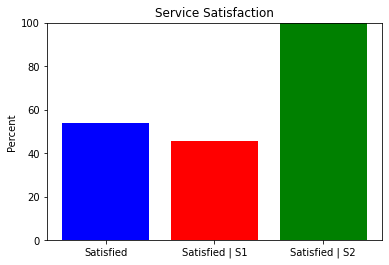

In [8]:
# Split the survey up into the S1 and S1 respondents
S1_survey = survey[:-4]  
S2_survey = survey[-4:]

# Import plotting library
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ind = np.arange(1, 4)

# Add up the number of patients who are satisfied and divide by the total number of patients of each type
sat_S1 = 100*np.sum(S1_survey,axis=0)[-1]/S1_survey.shape[0]
sat_S2 = 100*np.sum(S2_survey,axis=0)[-1]/S2_survey.shape[0]
sat = 100*np.sum(survey, axis=0)[-1]/survey.shape[0]

# Make a bar chart
pt, pd, pc = plt.bar(ind, (sat, sat_S1, sat_S2))

# Assign colors to bars
pt.set_facecolor('b')
pd.set_facecolor('r')
pc.set_facecolor('g')

# Label plot
ax.set_xticks(ind)
ax.set_xticklabels(['Satisfied', 'Satisfied | S1', 'Satisfied | S2'])
ax.set_ylim([0, 100])
ax.set_ylabel('Percent')
_ = ax.set_title('Service Satisfaction')

**Output Explanation:** This plot shows the proportion of satisfied S1 patients (red), satisfied S2 patients (green), and satisfied patients at large (blue).

Well, that's confusing. According to our survey results, 100% of S2 patients are satisfied and the S1 patients were split on satisfaction. But when we input features for other service entities based in urban areas, our classifier will typically say that patients will not be satisfied. What's going on here?

Let's look at a different dimension of our data and plot the total number of survey responses from S1 and S2 patients.

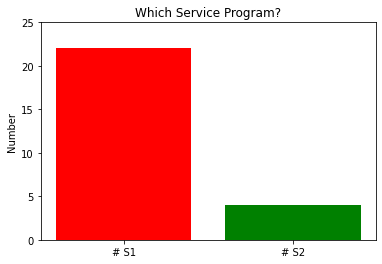

In [9]:
# Import library to make plots
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ind = np.arange(1, 3)

# Count the number of responses from dog vs cat owners
S1 = S1_survey.shape[0]
S2 = S2_survey.shape[0]

# Make a bar chart
pd, pc = plt.bar(ind, (S1, S2))

# Assign colors to bars
pd.set_facecolor('r')
pc.set_facecolor('g')

# Put labels on everything
ax.set_xticks(ind)
ax.set_xticklabels(['# S1', '# S2'])
ax.set_ylim([0, 25])
ax.set_ylabel('Number')
_ = ax.set_title('Which Service Program?')

**Output Explanation:** This plot shows the raw frequency of S1 (red) and S2 (green) patients in our sample.

Uh oh! Most of our survey respondents were S1 patients.

**Mistake #1:** We sampled from an S1-biased set and did not check the distribution before making our model, so our dataset was *not* appropriately representative.

**Ways to address this:** Use of more robust sampling and weighting methodologies.

But this still doesn’t fully provide an answer as to why the model seems biased against service entities in urban settings as both S2 (urban) and S1 (rural) offer services that may be rendered online, are patient-centered, culturally responsive, and timely.

Let's take a closer look at this. We'll plot how often each feature is true for both S1 and S2 by dividing the number of times each feature is true for each service by the total number of survey responses we have for each service.  

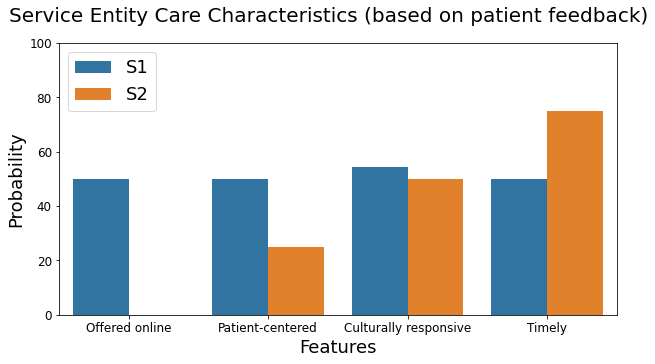

In [10]:
# Import libraries to build a plot
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ind = np.arange(0, 4)

# Count number of S1 and S2 surveys
total_S1 = S1_survey.shape[0]
total_S2 = S2_survey.shape[0]

# Count how often each feature is true divided by how many S1 and S2 respondents we have
S2_prob = 100*S2_survey[:,:4].sum(axis=0)/total_S2
S1_prob = 100*S1_survey[:,:4].sum(axis=0)/total_S1

# Input the data into a bar plot
data = {'Feature':[], 'Service':[], 'Probability':[]}
for feature in range(4):
  data['Feature'].append(feature)
  data['Service'].append('S1')
  data['Probability'].append(S1_prob[feature])

  data['Feature'].append(feature)
  data['Service'].append('S2')
  data['Probability'].append(S2_prob[feature])
df = pd.DataFrame(data=data)

_ = sns.barplot(x='Feature', y='Probability', hue='Service', data=df, ax=ax)

# Label plot
ax.set_xticklabels(['Offered online', 'Patient-centered', 'Culturally responsive', 'Timely'])
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
_ = fig.suptitle('Service Entity Care Characteristics (based on patient feedback)', fontsize=20)
_ = plt.ylabel('Probability', fontsize=18)
_ = ax.set_ylim([0, 100])
_ = plt.xlabel('Features', fontsize=18)
_ = plt.legend(loc='best', prop={'size':18})

**Output Explanation:** This plot shows the calculated probability of each entity's service characteristics, based on our sample.



Although we know that both entities offer telehealth services, it turns out that **none** of the S2 patients in our sample were offered care frequently online via telehealth in the last year. Since this is the case, we suspect that undetected **feature correlation** (a feature that is unintentionally correlated to a specific prediction or hidden category) may be driving this bias. 

In this case, knowing if care services are frequently offered online may be a subtle *cheat* for knowing that the entity is based in an urban area, *even though we didn’t provide this information to the model.*

Because there were no contextualizing data available to inform it otherwise, the model might have interpreted that care frequently offered online is associated with patient satisfaction. Let's take a closer look at this.

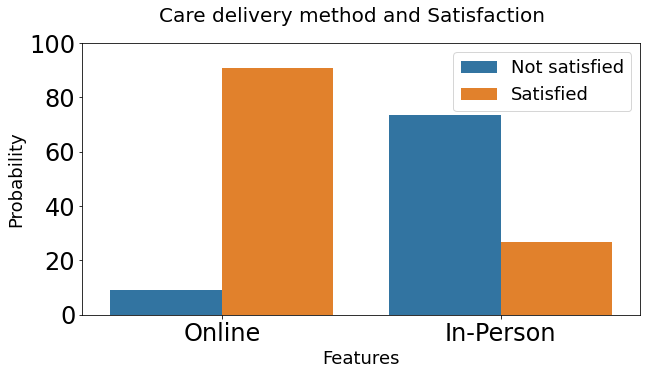

In [11]:
# Import libraries for a plot
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ind = np.arange(0, 4)

# Count how often each respondent receives care online or in-person
online = [0,0]
online_count = 0
offline = [0,0]
offline_count = 0

for entry in survey:
  if entry[0] == 0:
    offline[entry[-1]] += 1
    offline_count += 1
  else:
    online[entry[-1]] += 1
    online_count += 1

# Put the values in a a database
data = {'Feature':[], 'Satisfied':[], 'Probability':[]}
data["Feature"].append("Online")
data["Satisfied"].append("Not satisfied")
data["Probability"].append(100*online[0]/online_count)

data["Feature"].append("Online")
data["Satisfied"].append("Satisfied")
data["Probability"].append(100*online[1]/online_count)

data["Feature"].append("Offline")
data["Satisfied"].append("Not satisfied")
data["Probability"].append(100*offline[0]/offline_count)

data["Feature"].append("Offline")
data["Satisfied"].append("Satisfied")
data["Probability"].append(100*offline[1]/offline_count)

df = pd.DataFrame(data=data)

# Plot bar plot and put labels on everything
_ = sns.barplot(x='Feature', y='Probability', hue='Satisfied', data=df, ax=ax)
ax.set_xticklabels(['Online', 'In-Person'])
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
_ = fig.suptitle('Care delivery method and Satisfaction', fontsize=20)
_ = plt.ylabel('Probability', fontsize=18)
_ = ax.set_ylim([0, 100])
_ = plt.xlabel('Features', fontsize=18)
_ = plt.legend(loc='best', prop={'size':18})

**Output Explanation:** This plot shows the calculated probability of patients' reported satisfaction by service delivery method.

In our dataset, if a health service is offered online, a person is very likely to be satisfied with it... *no matter what other features are true.* But if the service isn’t offered online, it’s a mixed bag.

**Mistake #2:** Because our dataset had a correlated feature, our model found misleading patterns and made innapropriate decisions.

# Why did this happen?

After speaking with subject matter experts to contextualize this correlation, we found that although S2 offers online and telehealth services for routine visits, most patients opt to be seen in person citing the entity's convenient location next to the bus stop and the expense of reliable home internet access. At S1, however, the lack of available public transportation in its rural community (and the town's recent move to subsidize internet access for residents) makes online/telehealth services more accessible to the routine patient population.

Failure to account for these contextualizing nuances (as well as our sampling errors) led to **misrepresentation** in our dataset and **misinterpretation** by our model.